In [ ]:
import matplotlib.pyplot as plt
from numpy import absolute
from numpy import mean
from numpy import std
import glob
import os
import re
import numpy as np
import tensorflow as tf
import pandas as pd
import pprint
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import keras.backend as k

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/MyDrive/Thesis/Plots')
myfiles = glob.glob('*.txt')
# print(myfiles)
print(len(myfiles))

Mounted at /content/gdrive
5801


In [ ]:
list = []
x = []

for ele in myfiles:
    # file = open(ele)
    # content = file.readlines()

    f = open(ele,'r')
    
    # list.append(f)
    for i in f:
        # list.append(i)
        list.append(i)
        # print(i)
    temp = []
    fileName = ele.split('_')
    for i in range(0,6):
      temp.append(float(fileName[i]))

    x.append(temp)
    
# print(list[0])

y = []

for i in list:
  # row = re.split("\\s+", list[j])
  list_ele = re.split("\\s+", i)
  temp = []
  for j in range(100,200):
    temp.append(float(list_ele[j]))
  # print(list_ele)
  y.append(temp)


x = np.array(x)
y = np.array(y)

x = x/25


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

# TO GET SOME DATAPONTS UNSEEN BY MODEL
x = x_val[:116]
y = y_val[:116]

y_d = y

x_val = x_val[116:]
y_val = y_val[116:]

In [ ]:
axs = []
for i in range(1,101):
  axs.append(i)

In [ ]:
# forward_model = DecisionTreeRegressor()
# forward_model.fit(x_train, y_train)
input_size = 6
output_size = 100
hidden_layer_size = 50
    
forward_model_nn = tf.keras.Sequential([
   
    tf.keras.layers.Flatten(input_shape=(6, 1)), # input layer
 
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),

    # tf.keras.layers.Dense(16, activation='relu'),
    # tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dense(256, activation='relu'),
    # tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(100, activation='linear')
])

forward_model_nn.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = forward_model_nn.fit(x_train, y_train, epochs=200, validation_data=(x_val, y_val))

ypred_nn = forward_model_nn.predict(x_test)


Epoch 1/200
145/145 [==============================] - 5s 24ms/step - loss: 0.0395 - accuracy: 0.0343 - val_loss: 0.0283 - val_accuracy: 0.0452
Epoch 2/200
145/145 [==============================] - 4s 30ms/step - loss: 0.0235 - accuracy: 0.0541 - val_loss: 0.0202 - val_accuracy: 0.0645
Epoch 3/200
145/145 [==============================] - 4s 26ms/step - loss: 0.0194 - accuracy: 0.0642 - val_loss: 0.0178 - val_accuracy: 0.0624
Epoch 4/200
145/145 [==============================] - 3s 23ms/step - loss: 0.0166 - accuracy: 0.0810 - val_loss: 0.0153 - val_accuracy: 0.0839
Epoch 5/200
145/145 [==============================] - 3s 22ms/step - loss: 0.0147 - accuracy: 0.0983 - val_loss: 0.0132 - val_accuracy: 0.1269
Epoch 6/200
145/145 [==============================] - 4s 31ms/step - loss: 0.0136 - accuracy: 0.1086 - val_loss: 0.0120 - val_accuracy: 0.1333
Epoch 7/200
145/145 [==============================] - 4s 26ms/step - loss: 0.0122 - accuracy: 0.1108 - val_loss: 0.0115 - val_accuracy:

# Linear Regression

In [ ]:
inverse_model_lr = LinearRegression()
inverse_model_lr.fit(y_train, x_train)

LinearRegression()

In [ ]:
x_pred_lr = inverse_model_lr.predict(y)
mse1 = mean_squared_error(x, x_pred_lr)
print(mse1)

0.07842792879648709


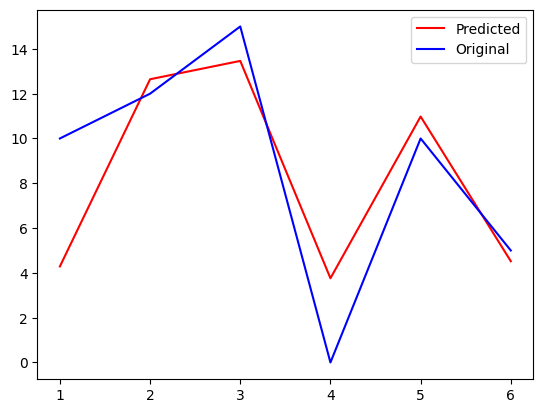

[ 4.28754639 12.64445095 13.46311242  3.75964108 10.9793      4.52071521]
1/1 [==============================] - 0s 31ms/step


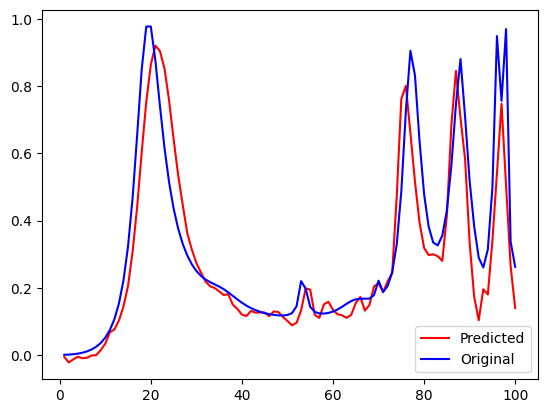

In [ ]:
a = [1,2,3,4,5,6]
plt.plot(a,x_pred_lr[0]*25,'r', label="Predicted")
plt.plot(a,x[0]*25,'b', label="Original")
plt.legend()
plt.show()
print(x_pred_lr[0]*25)

x_0 = x_pred_lr[0].reshape(1,-1)
final_pred_2_custom = forward_model_nn.predict(x_0)
plt.plot(axs,final_pred_2_custom[0],'r', label="Predicted")
plt.plot(axs,y[0],'b', label="Original")
plt.legend()
plt.show()

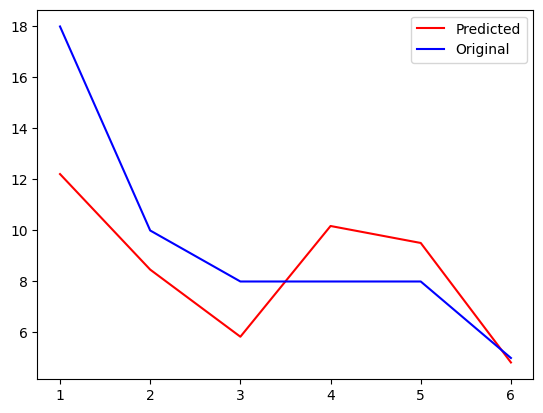

[12.21266045  8.46607083  5.8342046  10.17627145  9.51055664  4.82439536]
1/1 [==============================] - 0s 30ms/step


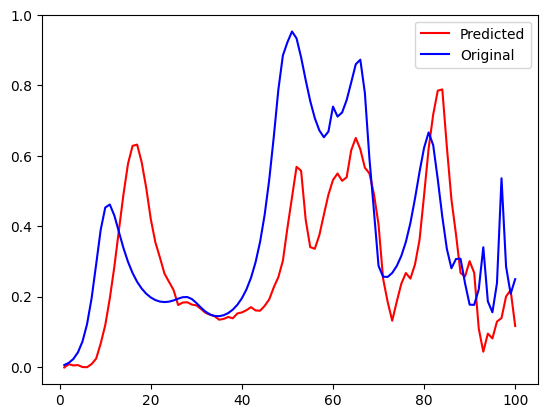

In [ ]:

a = [1,2,3,4,5,6]
plt.plot(a,x_pred_lr[105]*25,'r', label="Predicted")
plt.plot(a,x[105]*25,'b', label="Original")
plt.legend()
plt.show()
print(x_pred_lr[105]*25)

x_105 = x_pred_lr[105].reshape(1,-1)
final_pred_2_custom = forward_model_nn.predict(x_105)
plt.plot(axs,final_pred_2_custom[0],'r', label="Predicted")
plt.plot(axs,y[105],'b', label="Original")
plt.legend()
plt.show()

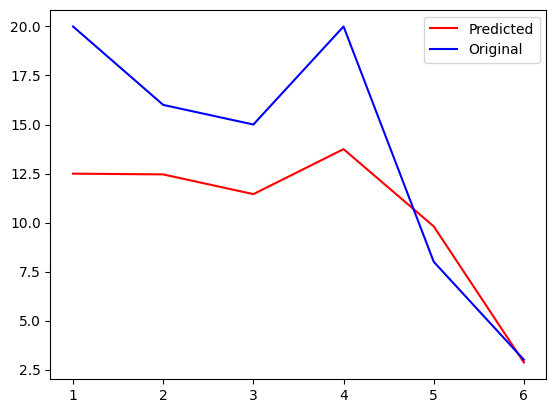

[12.49377693 12.45570025 11.44953267 13.74403046  9.80486335  2.86373567]
1/1 [==============================] - 0s 24ms/step


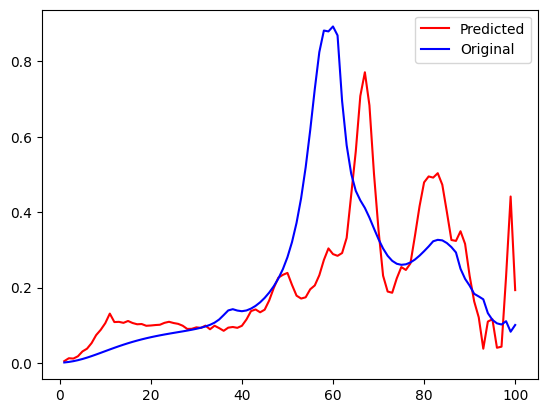

In [ ]:
a = [1,2,3,4,5,6]
plt.plot(a,x_pred_lr[107]*25,'r', label="Predicted")
plt.plot(a,x[107]*25,'b', label="Original")
plt.legend()
plt.show()
print(x_pred_lr[107]*25)

x_107 = x_pred_lr[107].reshape(1,-1)
final_pred_2_custom = forward_model_nn.predict(x_107)
plt.plot(axs,final_pred_2_custom[0],'r', label="Predicted")
plt.plot(axs,y[107],'b', label="Original")
plt.legend()
plt.show()

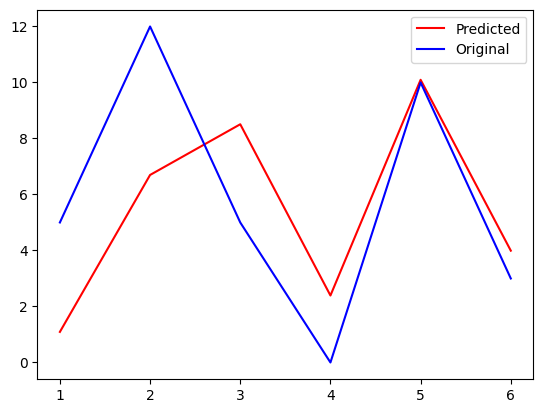

[ 1.09213541  6.69690262  8.50761206  2.39185654 10.09596301  3.9932072 ]
1/1 [==============================] - 0s 30ms/step


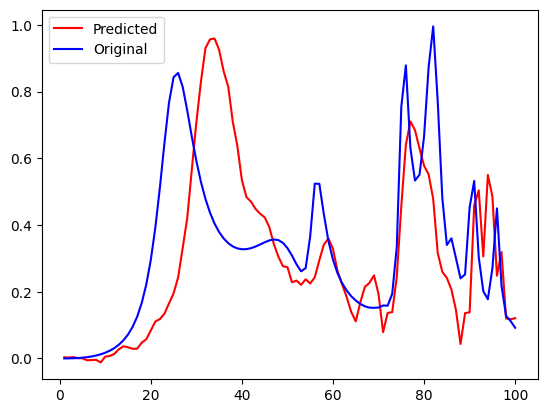

In [ ]:
a = [1,2,3,4,5,6]
plt.plot(a,x_pred_lr[112]*25,'r', label="Predicted")
plt.plot(a,x[112]*25,'b', label="Original")
plt.legend()
plt.show()
print(x_pred_lr[112]*25)

x_112 = x_pred_lr[112].reshape(1,-1)
final_pred_2_custom = forward_model_nn.predict(x_112)
plt.plot(axs,final_pred_2_custom[0],'r', label="Predicted")
plt.plot(axs,y[112],'b', label="Original")
plt.legend()
plt.show()

# KNN

In [ ]:
inverse_model_knn = KNeighborsRegressor()
inverse_model_knn.fit(y_train, x_train)

KNeighborsRegressor()

In [ ]:
x_pred_knn = inverse_model_knn.predict(y)
mse2 = mean_squared_error(x, x_pred_knn)
print(mse2)


0.025322022988505753


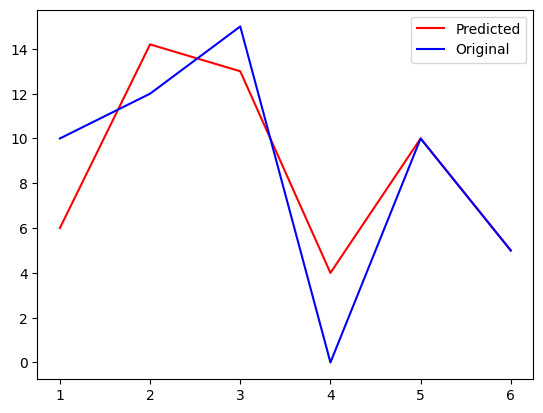

[ 6.  14.2 13.   4.  10.   5. ]
1/1 [==============================] - 0s 23ms/step


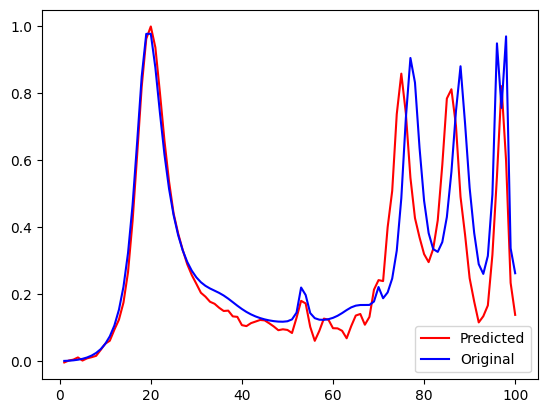

In [ ]:
a = [1,2,3,4,5,6]
plt.plot(a,x_pred_knn[0]*25,'r', label="Predicted")
plt.plot(a,x[0]*25,'b', label="Original")
plt.legend()
plt.show()
print(x_pred_knn[0]*25)

x_0 = x_pred_knn[0].reshape(1,-1)
final_pred_2_custom = forward_model_nn.predict(x_0)
plt.plot(axs,final_pred_2_custom[0],'r', label="Predicted")
plt.plot(axs,y[0],'b', label="Original")
plt.legend()
plt.show()

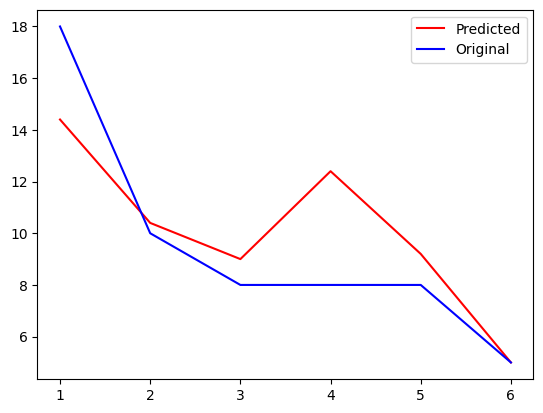

[14.4 10.4  9.  12.4  9.2  5. ]
1/1 [==============================] - 0s 26ms/step


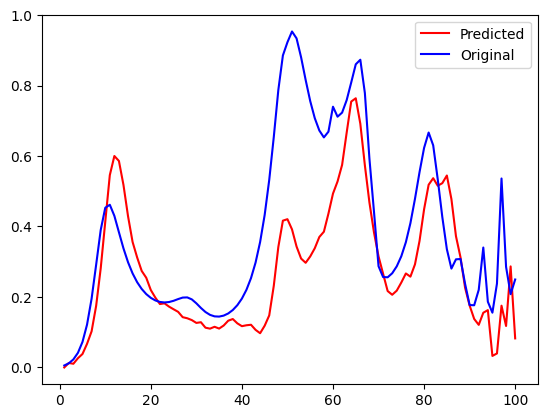

In [ ]:
a = [1,2,3,4,5,6]
plt.plot(a,x_pred_knn[105]*25,'r', label="Predicted")
plt.plot(a,x[105]*25,'b', label="Original")
plt.legend()
plt.show()
print(x_pred_knn[105]*25)

x_105 = x_pred_knn[105].reshape(1,-1)
final_pred_2_custom = forward_model_nn.predict(x_105)
plt.plot(axs,final_pred_2_custom[0],'r', label="Predicted")
plt.plot(axs,y[105],'b', label="Original")
plt.legend()
plt.show()

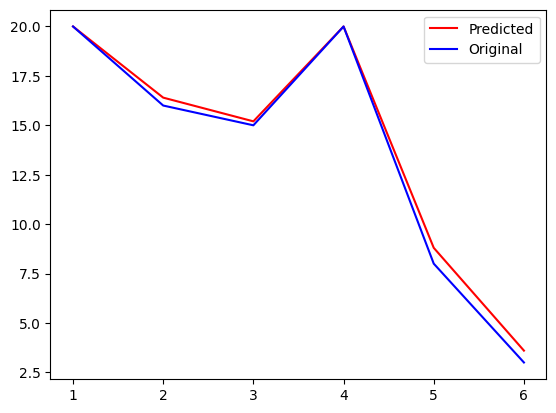

[20.  16.4 15.2 20.   8.8  3.6]
1/1 [==============================] - 0s 22ms/step


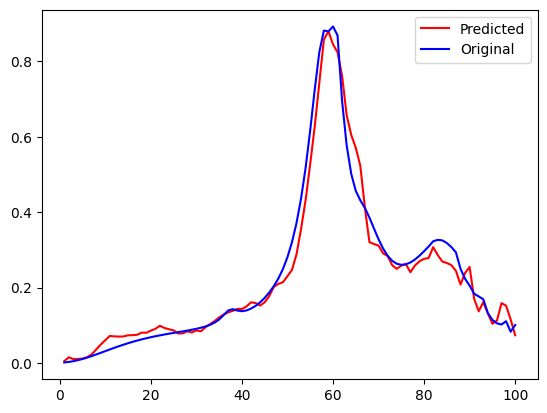

In [ ]:
a = [1,2,3,4,5,6]
plt.plot(a,x_pred_knn[107]*25,'r', label="Predicted")
plt.plot(a,x[107]*25,'b', label="Original")
plt.legend()
plt.show()
print(x_pred_knn[107]*25)

x_107 = x_pred_knn[107].reshape(1,-1)
final_pred_2_custom = forward_model_nn.predict(x_107)
plt.plot(axs,final_pred_2_custom[0],'r', label="Predicted")
plt.plot(axs,y[107],'b', label="Original")
plt.legend()
plt.show()

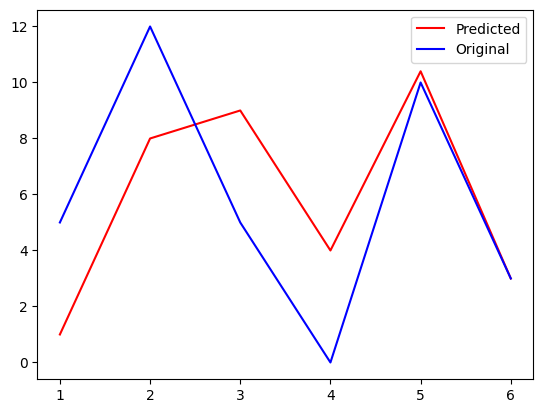

[ 1.   8.   9.   4.  10.4  3. ]
1/1 [==============================] - 0s 34ms/step


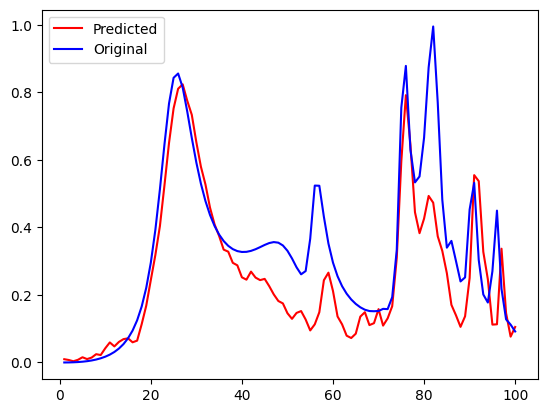

In [ ]:
a = [1,2,3,4,5,6]
plt.plot(a,x_pred_knn[112]*25,'r', label="Predicted")
plt.plot(a,x[112]*25,'b', label="Original")
plt.legend()
plt.show()
print(x_pred_knn[112]*25)

x_112 = x_pred_knn[112].reshape(1,-1)
final_pred_2_custom = forward_model_nn.predict(x_112)
plt.plot(axs,final_pred_2_custom[0],'r', label="Predicted")
plt.plot(axs,y[112],'b', label="Original")
plt.legend()
plt.show()

# Decision Tree

In [ ]:
inverse_model_dt = DecisionTreeRegressor()
inverse_model_dt.fit(y_train, x_train)

DecisionTreeRegressor()

In [ ]:
x_pred_dt = inverse_model_dt.predict(y)
mse3 = mean_squared_error(x, x_pred_dt)
print(mse3)

0.04602528735632186


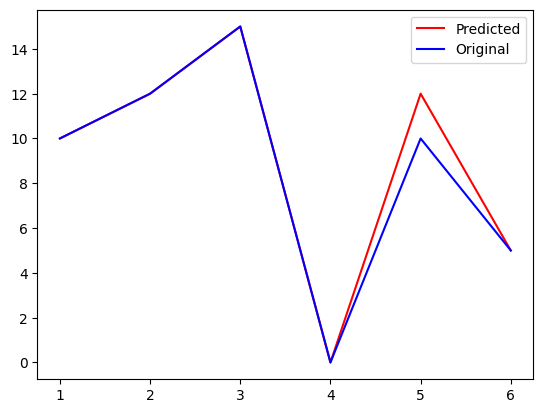

[10. 12. 15.  0. 12.  5.]
1/1 [==============================] - 0s 27ms/step


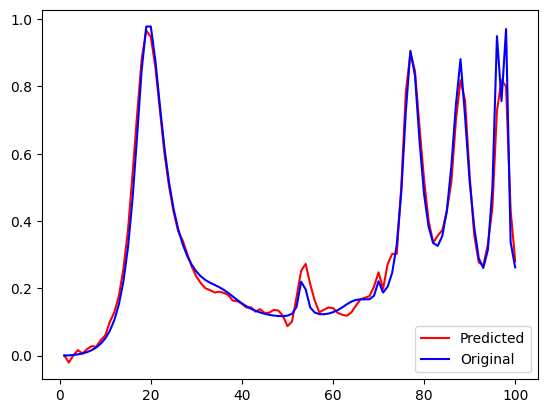

In [ ]:
a = [1,2,3,4,5,6]
plt.plot(a,x_pred_dt[0]*25,'r', label="Predicted")
plt.plot(a,x[0]*25,'b', label="Original")
plt.legend()
plt.show()
print(x_pred_dt[0]*25)

x_0 = x_pred_dt[0].reshape(1,-1)
final_pred_2_custom = forward_model_nn.predict(x_0)
plt.plot(axs,final_pred_2_custom[0],'r', label="Predicted")
plt.plot(axs,y[0],'b', label="Original")
plt.legend()
plt.show()

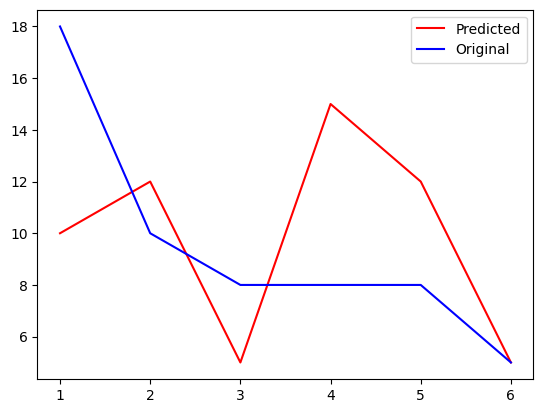

[10. 12.  5. 15. 12.  5.]
1/1 [==============================] - 0s 25ms/step


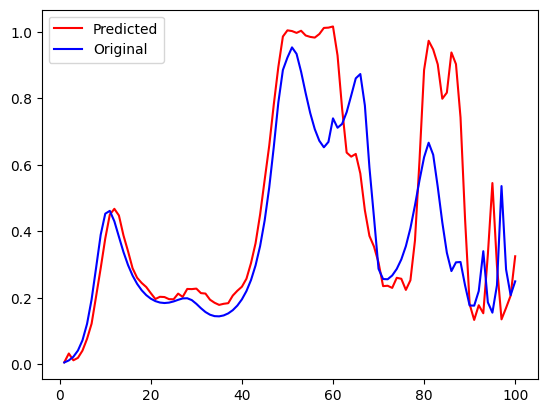

In [ ]:
a = [1,2,3,4,5,6]
plt.plot(a,x_pred_dt[105]*25,'r', label="Predicted")
plt.plot(a,x[105]*25,'b', label="Original")
plt.legend()
plt.show()
print(x_pred_dt[105]*25)

x_105 = x_pred_dt[105].reshape(1,-1)
final_pred_2_custom = forward_model_nn.predict(x_105)
plt.plot(axs,final_pred_2_custom[0],'r', label="Predicted")
plt.plot(axs,y[105],'b', label="Original")
plt.legend()
plt.show()

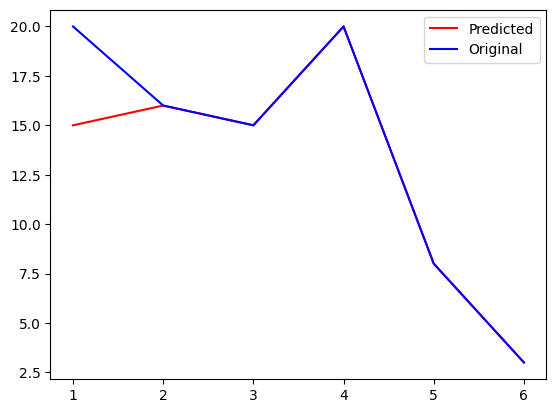

[15. 16. 15. 20.  8.  3.]
1/1 [==============================] - 0s 23ms/step


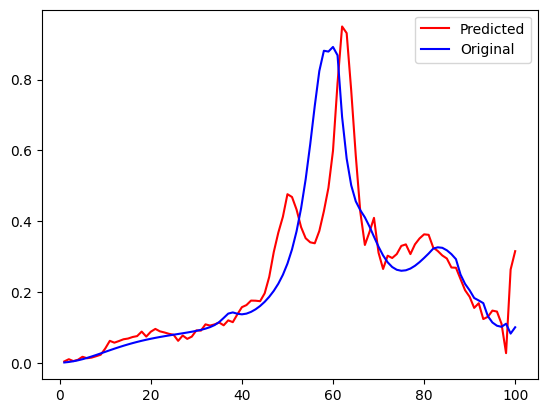

In [ ]:
a = [1,2,3,4,5,6]
plt.plot(a,x_pred_dt[107]*25,'r', label="Predicted")
plt.plot(a,x[107]*25,'b', label="Original")
plt.legend()
plt.show()
print(x_pred_dt[107]*25)

x_107 = x_pred_dt[107].reshape(1,-1)
final_pred_2_custom = forward_model_nn.predict(x_107)
plt.plot(axs,final_pred_2_custom[0],'r', label="Predicted")
plt.plot(axs,y[107],'b', label="Original")
plt.legend()
plt.show()

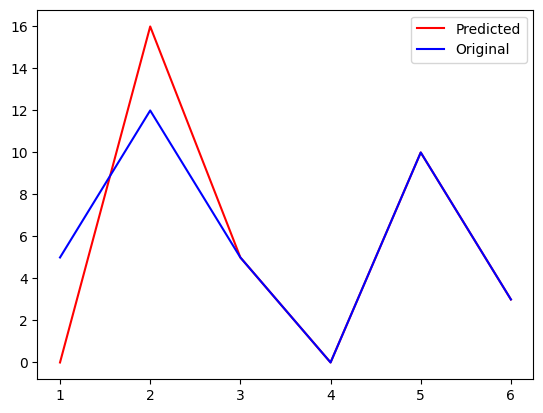

[ 0. 16.  5.  0. 10.  3.]
1/1 [==============================] - 0s 32ms/step


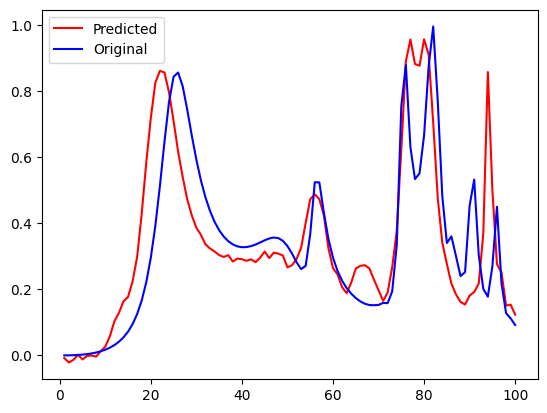

In [ ]:
a = [1,2,3,4,5,6]
plt.plot(a,x_pred_dt[112]*25,'r', label="Predicted")
plt.plot(a,x[112]*25,'b', label="Original")
plt.legend()
plt.show()
print(x_pred_dt[112]*25)

x_112 = x_pred_dt[112].reshape(1,-1)
final_pred_2_custom = forward_model_nn.predict(x_112)
plt.plot(axs,final_pred_2_custom[0],'r', label="Predicted")
plt.plot(axs,y[112],'b', label="Original")
plt.legend()
plt.show()

# COMSOL Prediction

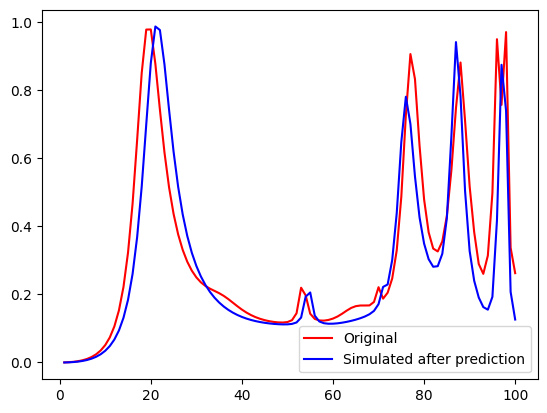

In [ ]:
f = open("/content/ 4.28754639_12.64445095_13.46311242_3.75964108_10.9793_4.52071521_.txt.txt", "r")
data = f.readline()

y1 = []

list_ele = re.split("\\s+", data)
temp = []
for j in range(100,200):
  temp.append(float(list_ele[j]))
# print(list_ele)
y1.append(temp)


# x = np.array(x)
y1 = np.array(y1)
# y1
# x = x/25
plt.plot(axs,y_d[0],'r', label="Original")
plt.plot(axs,y1[0],'b', label="Simulated after prediction")
plt.legend()
plt.show()

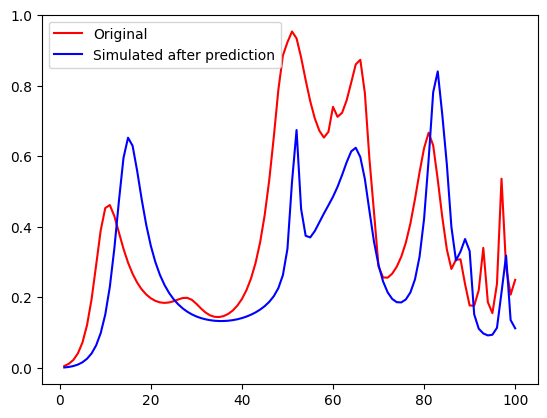

In [ ]:
f = open("/content/ 12.21266045_8.46607083_5.8342046_10.17627145_9.51055664_4.82439536_.txt.txt", "r")
data = f.readline()

y1 = []

list_ele = re.split("\\s+", data)
temp = []
for j in range(100,200):
  temp.append(float(list_ele[j]))
# print(list_ele)
y1.append(temp)


# x = np.array(x)
y1 = np.array(y1)
# y1
# x = x/25
plt.plot(axs,y_d[105],'r', label="Original")
plt.plot(axs,y1[0],'b', label="Simulated after prediction")
plt.legend()
plt.show()

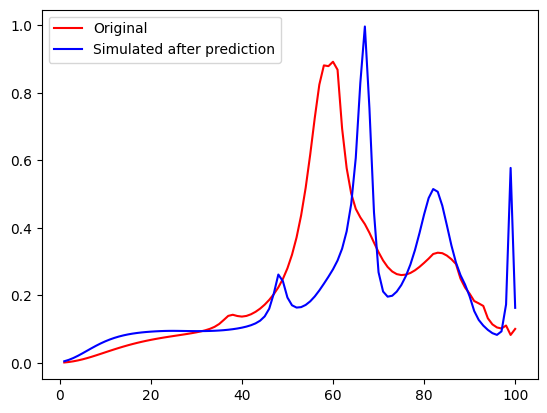

In [ ]:
f = open("/content/ 12.49377693_12.45570025_11.44953267_13.74403046_9.80486335_2.86373567_.txt.txt", "r")
data = f.readline()

y1 = []

list_ele = re.split("\\s+", data)
temp = []
for j in range(100,200):
  temp.append(float(list_ele[j]))
# print(list_ele)
y1.append(temp)


# x = np.array(x)
y1 = np.array(y1)
# y1
# x = x/25
plt.plot(axs,y_d[107],'r', label="Original")
plt.plot(axs,y1[0],'b', label="Simulated after prediction")
plt.legend()
plt.show()

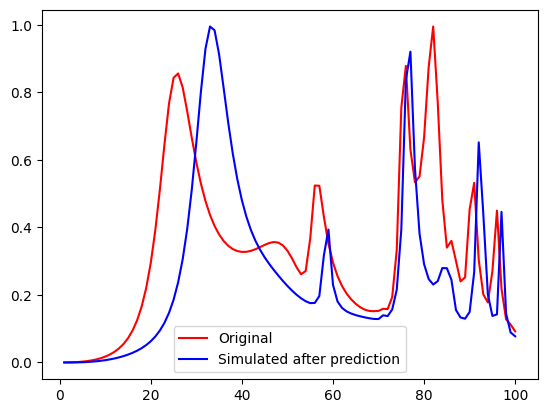

In [ ]:
f = open("/content/ 1.09213541_6.69690262_8.50761206_2.39185654_10.09596301_3.9932072_.txt.txt", "r")
data = f.readline()

y1 = []

list_ele = re.split("\\s+", data)
temp = []
for j in range(100,200):
  temp.append(float(list_ele[j]))
# print(list_ele)
y1.append(temp)


# x = np.array(x)
y1 = np.array(y1)
# y1
# x = x/25
plt.plot(axs,y_d[112],'r', label="Original")
plt.plot(axs,y1[0],'b', label="Simulated after prediction")
plt.legend()
plt.show()

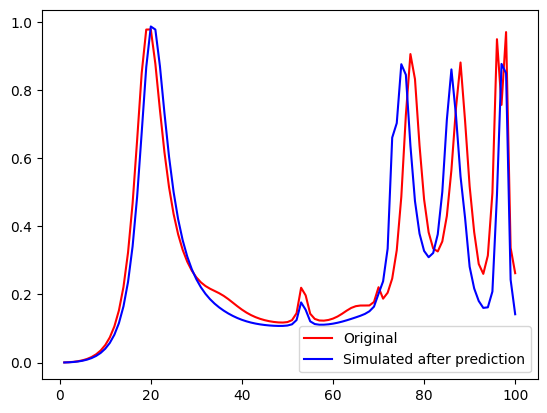

In [ ]:
f = open("/content/ 6_14.2_13_4_10_5_.txt.txt", "r")
data = f.readline()

y1 = []

list_ele = re.split("\\s+", data)
temp = []
for j in range(100,200):
  temp.append(float(list_ele[j]))
# print(list_ele)
y1.append(temp)


# x = np.array(x)
y1 = np.array(y1)
# y1
# x = x/25
plt.plot(axs,y_d[0],'r', label="Original")
plt.plot(axs,y1[0],'b', label="Simulated after prediction")
plt.legend()
plt.show()

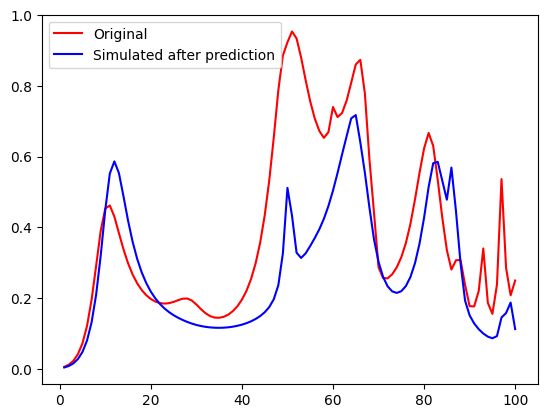

In [ ]:
f = open("/content/ 14.4_10.4_9_12.4_9.2_5_.txt.txt", "r")
data = f.readline()

y1 = []

list_ele = re.split("\\s+", data)
temp = []
for j in range(100,200):
  temp.append(float(list_ele[j]))
# print(list_ele)
y1.append(temp)


# x = np.array(x)
y1 = np.array(y1)
# y1
# x = x/25
plt.plot(axs,y_d[105],'r', label="Original")
plt.plot(axs,y1[0],'b', label="Simulated after prediction")
plt.legend()
plt.show()

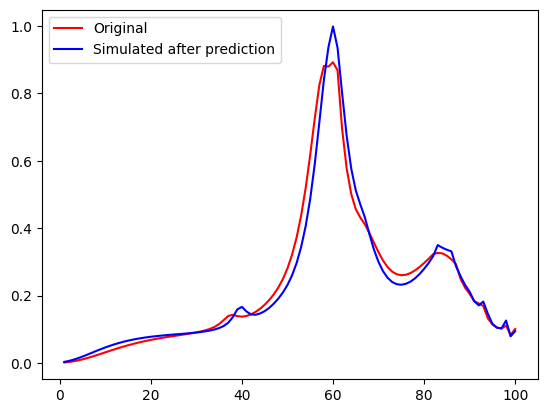

In [ ]:
f = open("/content/ 20_16.4_15.2_20_8.8_3.6_.txt.txt", "r")
data = f.readline()

y1 = []

list_ele = re.split("\\s+", data)
temp = []
for j in range(100,200):
  temp.append(float(list_ele[j]))
# print(list_ele)
y1.append(temp)


# x = np.array(x)
y1 = np.array(y1)
# y1
# x = x/25
plt.plot(axs,y_d[107],'r', label="Original")
plt.plot(axs,y1[0],'b', label="Simulated after prediction")
plt.legend()
plt.show()

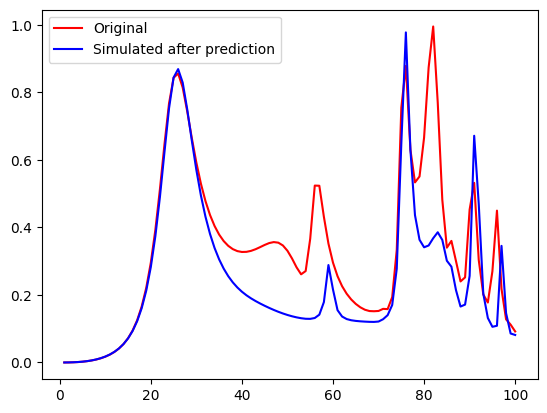

In [ ]:
f = open("/content/ 1_8_9_4_10.4_3_.txt.txt", "r")
data = f.readline()

y1 = []

list_ele = re.split("\\s+", data)
temp = []
for j in range(100,200):
  temp.append(float(list_ele[j]))
# print(list_ele)
y1.append(temp)


# x = np.array(x)
y1 = np.array(y1)
# y1
# x = x/25
plt.plot(axs,y_d[112],'r', label="Original")
plt.plot(axs,y1[0],'b', label="Simulated after prediction")
plt.legend()
plt.show()

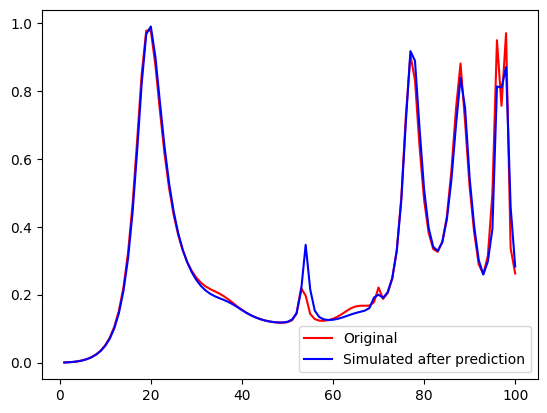

In [ ]:
f = open("/content/ 10_12_15_0_12_5_.txt.txt", "r")
data = f.readline()

y1 = []

list_ele = re.split("\\s+", data)
temp = []
for j in range(100,200):
  temp.append(float(list_ele[j]))
# print(list_ele)
y1.append(temp)


# x = np.array(x)
y1 = np.array(y1)
# y1
# x = x/25
plt.plot(axs,y_d[0],'r', label="Original")
plt.plot(axs,y1[0],'b', label="Simulated after prediction")
plt.legend()
plt.show()

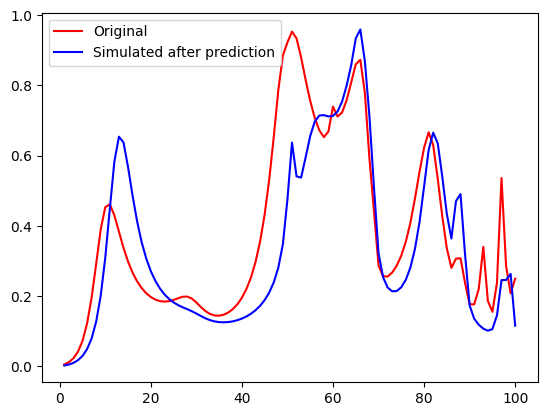

In [ ]:
f = open("/content/ 10_8_10_15_10_5_.txt.txt", "r")
data = f.readline()

y1 = []

list_ele = re.split("\\s+", data)
temp = []
for j in range(100,200):
  temp.append(float(list_ele[j]))
# print(list_ele)
y1.append(temp)


# x = np.array(x)
y1 = np.array(y1)
# y1
# x = x/25
plt.plot(axs,y_d[105],'r', label="Original")
plt.plot(axs,y1[0],'b', label="Simulated after prediction")
plt.legend()
plt.show()

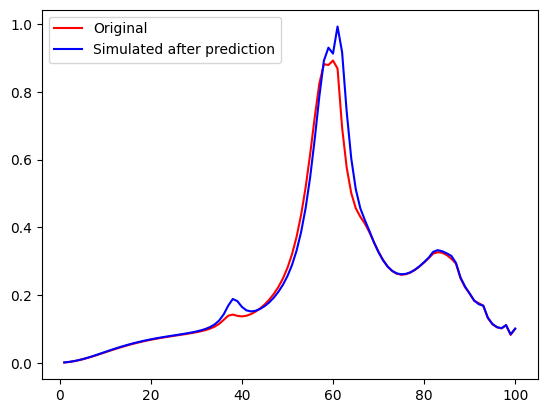

In [ ]:
f = open("/content/ 20_16_15_20_10_3_.txt.txt", "r")
data = f.readline()

y1 = []

list_ele = re.split("\\s+", data)
temp = []
for j in range(100,200):
  temp.append(float(list_ele[j]))
# print(list_ele)
y1.append(temp)


# x = np.array(x)
y1 = np.array(y1)
# y1
# x = x/25
plt.plot(axs,y_d[107],'r', label="Original")
plt.plot(axs,y1[0],'b', label="Simulated after prediction")
plt.legend()
plt.show()

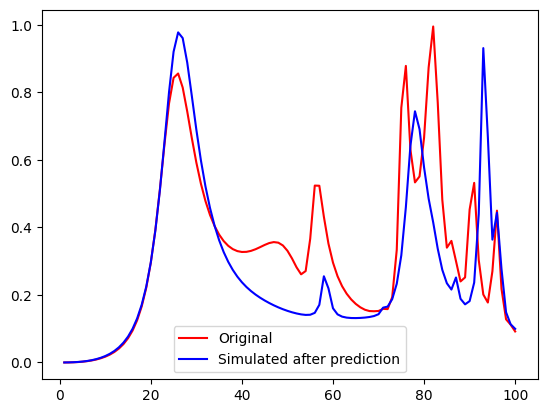

In [ ]:
f = open("/content/ 0_12_10_0_10_3_.txt.txt", "r")
data = f.readline()

y1 = []

list_ele = re.split("\\s+", data)
temp = []
for j in range(100,200):
  temp.append(float(list_ele[j]))
# print(list_ele)
y1.append(temp)


# x = np.array(x)
y1 = np.array(y1)
# y1
# x = x/25
plt.plot(axs,y_d[112],'r', label="Original")
plt.plot(axs,y1[0],'b', label="Simulated after prediction")
plt.legend()
plt.show()